# Homework 1 (HW1)

---
By the end of this homework we expect you to be able to:
1. Load data from different formats using [pandas](https://pandas.pydata.org/);
2. Navigate the documentation of Python packages by yourself;
3. Filter and tidy up noisy data sets;
4. Aggregate your data in different (and hopefully helpful) ways; 
5. Create meaningful visualizations to analyze the data;
6. Critically think and write about data;
---

## Important Dates

- Homework release: Fri 8 Oct 2021
- **Homework due**: Fri 22 Oct 2021, 23:59
- Grade release: Fri 29 Oct 2021

---

##  Some rules

1. You are allowed to use any built-in Python library that comes with Anaconda. If you want to use an external library, 
you may do so, but must justify your choice.
2. Make sure you use the `data` folder provided in the repository in read-only mode. (Or alternatively, be sure you 
don’t change any of the files.)
3. Be sure to provide a textual description of your thought process, the assumptions you made, the solution you 
implemented, and explanations for your answers. A notebook that only has code cells will not suffice.
4. For questions containing the **/Discuss:/** prefix, answer not with code, but with a textual explanation
 (**in markdown**).
5. Back up any hypotheses and claims with data, since this is an important aspect of the course.
6. Please write all your comments in English, and use meaningful variable names in your code. Your repo should have a 
single notebook (plus the required data files) in the *master/main* branch. If there are multiple notebooks present, 
we will **not grade** anything.
7. We will **not run your notebook for you**! Rather, we will grade it as is, which means that only the results 
contained in your evaluated code cells will be considered, and we will not see the results in unevaluated code cells. 
Thus, be sure to hand in a **fully-run and evaluated notebook**. In order to check whether everything looks as intended,
 you can check the rendered notebook on the GitHub website once you have pushed your solution there.
8. In continuation to the previous point, interactive plots, such as those generated using `plotly`, should be 
**strictly avoided**!
9. Make sure to print results or dataframes that confirm you have properly addressed the task.

---

## Context

In this project, we are going to analyze data from an experiment about *honesty*. 
Oftentimes, we are asked to confirm our honest intentions by signing **at the end** of a document. 
For example, in tax returns or insurance policy forms, we are often asked to sign our names under a text that reads 
something like "I hereby certify that the above statements are true and correct to the best of my knowledge."

However, when individuals sign **after** lying in the form, they may not feel the need to correct the falsehoods they 
have reported. In that context, it could be that signing at **the beginning** rather than at the end of the document 
would decrease dishonesty, as those who are filling the form would be aware of the ethical requirements *before* they 
provide the information in the form.

This intuition has led researchers to partner up with a motorcycle insurance company to run a randomized experiment. 
In this insurance company (as well as in many others), customers had to report the exact *odometer kilometrage*¹ in 
order for the company to adjust the insurance premiums. Note that motorcycles with lower kilometrage are less likely to 
have issues, and thus will result in a lower *insurance premium*². Therefore, customers have an incentive to lie, 
reporting a kilometrage lower than the real value, in order to save money.

In the experiment, two different forms were created: one where the signing was done at the end, and another where the 
signing was done at the beginning. The insurance company then randomized these forms (i.e., each customer received
 exactly one form, each with probability 50%) and sent back the data that customers had provided. Some noteworthy 
 details on the experiment are that:

- All customers involved in the experiment already had a contract with the company and were simply renewing it. 
In the data that the company provided, they also report the odometer kilometrage for their previous contract.
Each policy, therefore, contains two contracts: the "updated" contract —where the experiment was conducted— and 
the "baseline" contract, which was the previous contract customers had with the company.
- A single insurance policy can insure up to 4 distinct motorcycles.

In this assignment, you will take the role of the researcher and work analyzing this data!

*Glossary:*
1. **odometer kilometrage:** the total distance the motorcycle has traveled.
2. **insurance premiums:** the amount of money one pays for an insurance policy.

---

## The data

The company provided you with a compressed `.tsv` file containing one row per policy. 
The `.tsv` has the following fields:

- `condition`: either `Sign Top` or `Sign Bottom`, depending on which form was sent.
- `id`: unique identifier for each insurance policy.
- `motorcycle_count`: number of motorcycles covered by the insurance policy.
- `baseline_motorcycle[1-4]`: odometer kilometrage *reported by the customer* in the *previous (baseline)* contract. 
- `update_motorcycle[1-4]`: odometer kilometrage *reported by the customer* in the *current (updated)* contract.

Some comments:

- Recall that a single policy can ensure up to 4 motorcycles, and thus, the suffixes [1-4] indicate that there are 4 
versions of these columns in the data (e.g., `baseline_motorcycle1`, `baseline_motorcycle2`, `baseline_motorcycle3`, 
`baseline_motorcycle4`). 
- When a policy has fewer than 4 motorcycles, only the columns with the smaller numerals are filled (e.g., if a policy 
insures one motorcycle,  only `baseline_motorcycle1` and `update_motorcycle1` will be filled).
- Note that we only have access to the odometer kilometrage reported by the customers, 
which may be different from the real kilometrage of the motorcycles.

In [2]:
# Imports you may need
import seaborn as sns
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import numpy as np

### **Task 1** — 4pts

Your first task is to load the dataset into memory using pandas. 
**You should load the data directly from the compressed files.**

Here, the files at hand are rather small, and you could easily uncompress the files to disk and work with them as plain 
text. Why, then, are we asking you to load the files compressed? The reason is that, in your life as a data scientist, 
this will often not be the case. Then, working with compressed files is key so that you don't receive email from your 
(often more responsible) colleagues demanding to know how you have managed to fill the entire cluster with your 
datasets. Another big advantage of compressing files is to simply read files faster. You will often find that reading
compressed data on the fly (uncompressing it as you go), is much faster than reading uncompressed data, since reading
and writing to disk may be your [bottleneck](https://skipperkongen.dk/2012/02/28/uncompressed-versus-compressed-read/). 

---

**Hint:** `pandas` can open compressed files.

**Hint:** In the real world (and in ADA-homework), your file often comes with some weird lines! 
This time you can safely ignore them (but in the real world you must try to understand why they are there!). 
Check the `error_bad_lines` or the `on_bad_lines` (depending on your pandas version) parameter on `read_csv`.

In [3]:
import os 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
os.chdir(r'C:\Users\Venia\Desktop\EPFL\CS401\2021\Homework\01 - Pandas Data Wrangling and Data Viz')

df = pd.read_csv("data/data.tsv.gz", sep = '\t', error_bad_lines=False)

b'Skipping line 2142: expected 11 fields, saw 27\n'


### Task 2 — 12pts

As a good data scientist, the first thing you do is to clean up the data and perform some small sanity checks.

1. The motorcycle insurance company mentioned that each policy has a unique identifier, but that there may be duplicate 
rows (i.e., multiple rows with the same policy identifier). Check if there are duplicate policies and, if so, filter 
these rows from the data (always keeping the first).

2. According to the company, all policies should have kept the number of motorcycles from the previous contract (i.e., 
the number of motorcycles recorded in baseline contracts should equal the number of motorcycles in updated contracts). 
Also, the number of odometer readings for each contract should be the same as the number stated in the 
`motorcycle_count` variable. Check the data to see if these two things hold. If not, filter the anomalous rows.

3. Calculate the mean and the median value of each column related to kilometrages. Are the values obtained plausible? 
Visualize the distribution of the data and remove any extreme outliers.

4. **Discuss:** In cases where you cannot think of appropriate ways to remove outliers, would you prefer summarizing 
numerical data with outliers with the mean or the median? Why?

---

**Hint:** Here we are considering as outliers numbers that are not plausible in the context of motorcycle kilometrages.

In [4]:
# returns the duplicated rows
df[df['id'].duplicated()]

,condition,id,baseline_motorcycle1,update_motorcycle1,baseline_motorcycle2,update_motorcycle2,baseline_motorcycle3,update_motorcycle3,baseline_motorcycle4,update_motorcycle4,motorcycle_count
14,Sign Bottom,14,83443,105094,NaN,NaN,NaN,NaN,NaN,NaN,1
333,Sign Bottom,332,1721,30093,30482.0,38315.0,NaN,NaN,NaN,NaN,2
751,Sign Top,749,101625,148134,135926.0,164660.0,NaN,NaN,NaN,NaN,2
1107,Sign Bottom,1104,114740,146569,NaN,NaN,NaN,NaN,NaN,NaN,1
1380,Sign Bottom,1376,46097,95235,NaN,NaN,NaN,NaN,NaN,NaN,1
1536,Sign Bottom,1531,72973,116284,NaN,NaN,NaN,NaN,NaN,NaN,1
1780,Sign Top,1774,21000,70058,NaN,NaN,NaN,NaN,NaN,NaN,1
2143,Sign Bottom,2136,13061,25046,NaN,NaN,NaN,NaN,NaN,NaN,1
13459,Sign Top,13451,10744,30334,60488.0,93297.0,NaN,NaN,NaN,NaN,2


In [5]:
# drops duplicates
df = df.drop_duplicates(subset = ['id'], keep = 'first')

In [6]:
# observe that the baseline_motorcycle == update motorcycle count
# count takes into account None, which are not counted
df.describe()

,id,baseline_motorcycle1,update_motorcycle1,baseline_motorcycle2,update_motorcycle2,baseline_motorcycle3,update_motorcycle3,baseline_motorcycle4,update_motorcycle4,motorcycle_count
count,1.348800e+04,1.348800e+04,1.348800e+04,5.648000e+03,5.648000e+03,1277.000000,1277.000000,326.000000,326.000000,13488.000000
mean,7.403514e+03,7.413998e+14,7.413998e+14,6.732597e+04,9.227763e+04,67657.320282,92849.408771,67827.975460,93374.279141,1.537589
std,7.657835e+04,8.610457e+16,8.610457e+16,6.022646e+04,6.188369e+04,64419.001860,66547.920222,54610.217241,56345.386070,0.614145
min,1.000000e+00,0.000000e+00,4.200000e+01,0.000000e+00,1.160000e+02,0.000000,155.000000,0.000000,622.000000,1.000000
25%,3.373750e+03,2.528125e+04,5.009600e+04,2.449825e+04,4.988875e+04,18500.000000,43872.000000,14284.750000,41525.500000,1.000000
50%,6.745500e+03,5.634150e+04,8.239750e+04,5.615750e+04,8.206100e+04,58821.000000,85645.000000,68181.000000,93387.500000,1.000000
75%,1.011725e+04,9.625925e+04,1.233340e+05,9.700000e+04,1.221915e+05,100000.000000,128037.000000,106882.000000,128940.500000,2.000000
max,8.888888e+06,1.000000e+19,1.000000e+19,1.000581e+06,1.030915e+06,884594.000000,931105.000000,217715.000000,244658.000000,4.000000


In [7]:
#
melted = df.melt(id_vars=['condition','id','motorcycle_count'])

In [8]:
melted['value'] = melted['value'].fillna("None")

In [9]:
melted['variable2'] = melted['variable'].apply(lambda x: x[-1])

In [10]:
check = melted[melted['value'] == "None"].groupby(['id','variable2'])['value'].count()

In [11]:
check = check.reset_index()
counts = check.groupby('id')['value'].count()

In [12]:
#Calculate the mean and the median value of each column related to kilometrages. Are the values obtained plausible?
#Visualize the distribution of the data and remove any extreme outliers.

df[['baseline_motorcycle1','update_motorcycle1', "baseline_motorcycle2", "update_motorcycle2", "baseline_motorcycle3", "update_motorcycle3", "baseline_motorcycle4", "update_motorcycle4"]].agg(['mean','median'])

,baseline_motorcycle1,update_motorcycle1,baseline_motorcycle2,update_motorcycle2,baseline_motorcycle3,update_motorcycle3,baseline_motorcycle4,update_motorcycle4
mean,7.413998e+14,7.413998e+14,67325.967422,92277.633144,67657.320282,92849.408771,67827.97546,93374.279141
median,5.634150e+04,8.239750e+04,56157.500000,82061.000000,58821.000000,85645.000000,68181.00000,93387.500000


Text(0.5, 0.98, 'Baseline Motorcycle Histograms')

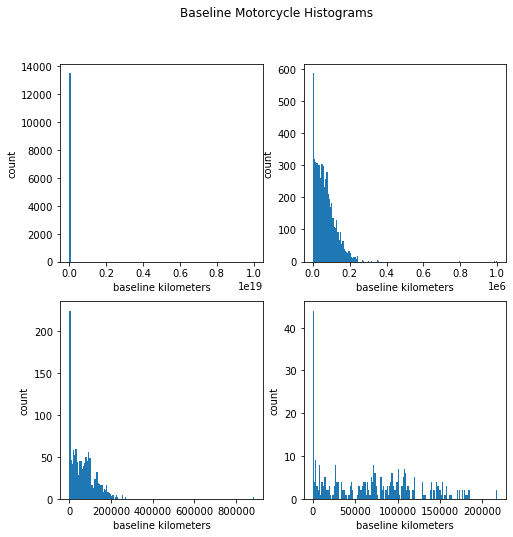

In [13]:
# plot the baseline motorcycle distributions
fig, axs =plt.subplots(2,2, figsize = (8,8))
for i, ax in enumerate(axs.flat):
    i += 1
    ax.hist(df['baseline_motorcycle{}'.format(i)], bins = 150)
    ax.grid(False)
    ax.set_xlabel("baseline kilometers")
    ax.set_ylabel("count")
plt.suptitle("Baseline Motorcycle Histograms")

Text(0.5, 0.98, 'Updated Motorcycle Histograms')

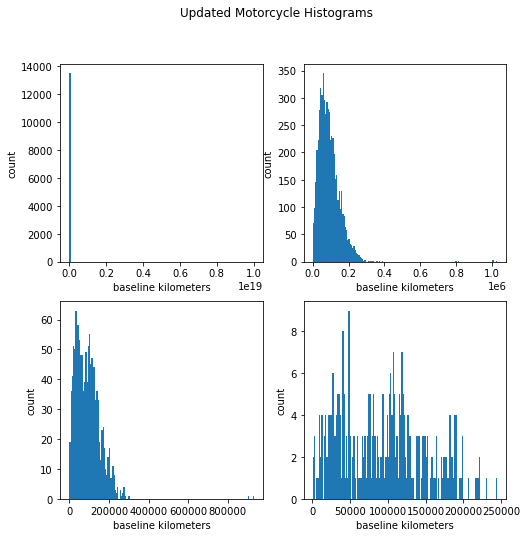

In [47]:
# plot the updated motorcycle distributions
fig, axs =plt.subplots(2,2, figsize = (8,8))
for i, ax in enumerate(axs.flat):
    i += 1
    ax.hist(df['update_motorcycle{}'.format(i)], bins = 150)
    ax.grid(False)
    ax.set_xlabel("baseline kilometers")
    ax.set_ylabel("count")
plt.suptitle("Updated Motorcycle Histograms")

In [14]:
# there clearly appears to be an outlier in baseline_1 and update_1
# it should not be possible to bike 1e19 kms!!!
# to remove these outliers we'll use the other baselines as a proxy for expected upper bound
# we notice a general trend that as the number of motorcycles increases the ranges go down
# so we'll use 3x the max of the baseline_2 and update_2

scaler = 3

df_no_outliers = df[(df['baseline_motorcycle1'] < df['baseline_motorcycle2'].max() * scaler) & (df['update_motorcycle1'] < df['update_motorcycle2'].max() * scaler)]

In [15]:
# view the mean and median data
df_no_outliers[['baseline_motorcycle1','update_motorcycle1', "baseline_motorcycle2", "update_motorcycle2", "baseline_motorcycle3", "update_motorcycle3", "baseline_motorcycle4", "update_motorcycle4"]].agg(['mean','median'])

,baseline_motorcycle1,update_motorcycle1,baseline_motorcycle2,update_motorcycle2,baseline_motorcycle3,update_motorcycle3,baseline_motorcycle4,update_motorcycle4
mean,67345.119457,92275.012012,67326.871436,92276.41739,67657.320282,92849.408771,67827.97546,93374.279141
median,56341.500000,82382.000000,56157.000000,82056.00000,58821.000000,85645.000000,68181.00000,93387.500000


Text(0.5, 0.98, 'Baseline Motorcycle Histograms (dropped anomalies)')

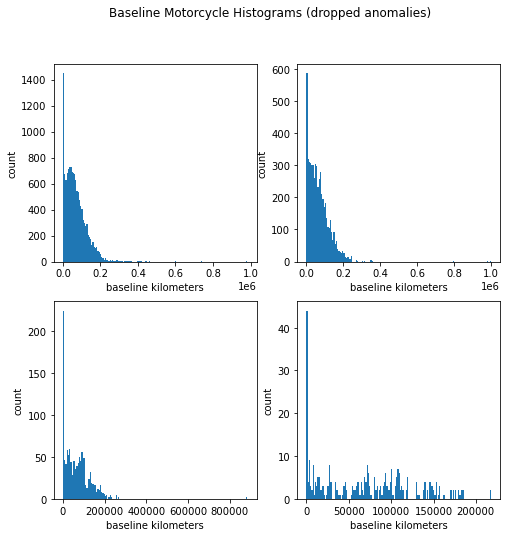

In [16]:
fig, axs =plt.subplots(2,2, figsize = (8,8))
for i, ax in enumerate(axs.flat):
    i += 1
    ax.hist(df_no_outliers['baseline_motorcycle{}'.format(i)], bins = 150)
    ax.grid(False)
    ax.set_xlabel("baseline kilometers")
    ax.set_ylabel("count")
plt.suptitle("Baseline Motorcycle Histograms (dropped anomalies)")

Text(0.5, 0.98, 'Updated Motorcycle Histograms (dropped anomalies)')

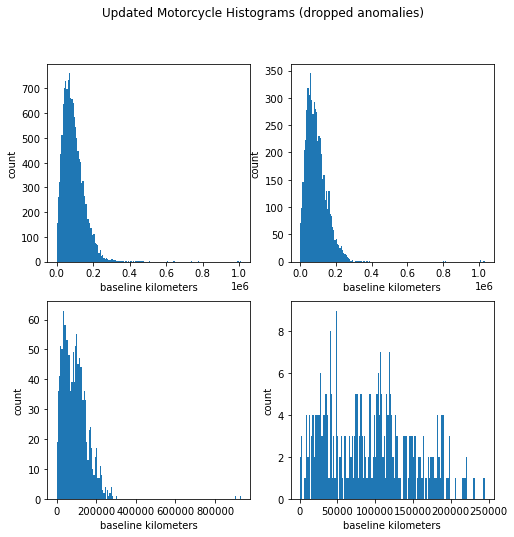

In [17]:
fig, axs =plt.subplots(2,2, figsize = (8,8))
for i, ax in enumerate(axs.flat):
    i += 1
    ax.hist(df_no_outliers['update_motorcycle{}'.format(i)], bins = 150)
    ax.grid(False)
    ax.set_xlabel("baseline kilometers")
    ax.set_ylabel("count")
plt.suptitle("Updated Motorcycle Histograms (dropped anomalies)")

## Discussion: Effect of outliers on on mean median

The outliers in the above example were very easy to identify. No motorcycle would be able to be alive after 1e19kms. Moreover, no one person can live long enough to bike that many KMs. One notices, however, that when originally calculating the mean / median of the dataset, the *mean was far more receptive to the outliers than the median*. Originally the mean for baseline_motorcycle1 was 7.413998e+14 and after removal we get down to 67345.11. Alternatively, the median (56341.50) did not change.  A similar observation holds for the update motorcycle data. 

**This means that using the median is better for datasets where the underlying distribution is not known.**

### Task 3 — 12pts

One of the challenges with the current data is that it is not clear how to handle policies with multiple motorcycles.

1. Create three additional columns in the dataframe, `baseline_average`, `update_average`, and `diff_average`. These 
should contain, respectively, the average value for `baseline_motorcycle[1-4]` for all motorcycles insured; the average
 value for `update_motorcycle[1-4]`; and the difference between the average updated value and the average baseline 
 value.
2. **Discuss:** Propose another way of aggregating distinct motorcycles from a single policy. Point out a way in which 
this aggregation may be either better or worse than taking the average for the purpose of comparing the two scenarios in
 the study (sign at the top vs. sign at the bottom).
3. To get a sense of the impact that policies with multiple motorcycles may have in the study, let's perform some 
additional analyses. Plot the distribution of motorcycles per policy in the data. Your plot should allow for the 
meaningful comparison of the values shown.
4. In 3.1, you calculated the average kilometrage for each policy for the updated contract. Calculate the mean and the 
standard deviation of these values (which should be in the column `update_average`).
5. Another meaningful metric is the average kilometrage **per motorcycle**, not distinguishing motorcycles in different 
policies (i.e., pooled across policies). **Considering only policies with 4 motorcycles insured,** calculate the mean 
and the standard deviation of the kilometrage per motorcycle in the updated contract.
6. **Discuss:** To analyze whether signing at the top decreases dishonesty, we could consider the data in different 
ways. We could first calculate the average value per motorcycle within each policy and have one data point per policy 
**or** we could analyze the data at the motorcycle level and have one data point per motorcycle in the dataset. 
According to questions 3.4 and 3.5, how may this decision influence the results of the study?
---

In [18]:
# otherwise we might forget ... 
df = df_no_outliers
baseline_cols = ['baseline_motorcycle1','baseline_motorcycle2','baseline_motorcycle3','baseline_motorcycle4']
update_cols = ['update_motorcycle1','update_motorcycle2','update_motorcycle3','update_motorcycle4']

# we notice that skipna is by default true for the mean operator
# set axis = 1 to take average along the columns
df['baseline_average'] = df[baseline_cols].mean(skipna=True, axis=1)
df['update_average'] = df[update_cols].mean(skipna=True,axis=1)
df['diff_average'] = df['update_average'] - df['baseline_average']

In [70]:
df.head(5)

,condition,id,baseline_motorcycle1,update_motorcycle1,baseline_motorcycle2,update_motorcycle2,baseline_motorcycle3,update_motorcycle3,baseline_motorcycle4,update_motorcycle4,motorcycle_count,baseline_average,update_average,diff_average
0,Sign Top,1,896,39198,NaN,NaN,NaN,NaN,NaN,NaN,1,896.0,39198.0,38302.0
1,Sign Bottom,2,21396,63511,32659.0,47605.0,NaN,NaN,NaN,NaN,2,27027.5,55558.0,28530.5
2,Sign Bottom,3,21340,37460,44998.0,59002.0,NaN,NaN,NaN,NaN,2,33169.0,48231.0,15062.0
3,Sign Bottom,4,23912,59136,NaN,NaN,NaN,NaN,NaN,NaN,1,23912.0,59136.0,35224.0
4,Sign Bottom,5,16862,59292,NaN,NaN,NaN,NaN,NaN,NaN,1,16862.0,59292.0,42430.0


---------
# TODO
We could sum all the values and treat it as one motorcycle. If we assume that the insurer uses his motorcycles equally then this will not be a bad estimate. The issue with this aggregation is that it loses ambiguity between motorcycles. 

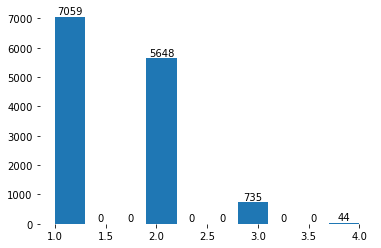

In [19]:
import numpy as np
fig, ax = plt.subplots()
freq, bins, patches = plt.hist(df['motorcycle_count'])

# improve this bar plot 

# x coordinate for labels
bin_centers = np.diff(bins)*0.5 + bins[:-1]

n = 0
for fr, x, patch in zip(freq, bin_centers, patches):
    height = int(freq[n])
    plt.annotate("{}".format(height),
               xy = (x, height),             # top left corner of the histogram bar
               xytext = (0,0.2),             # offsetting label position above its bar
               textcoords = "offset points", # Offset (in points) from the *xy* value
               ha = 'center', va = 'bottom'
               )
    n = n+1
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)


In [ ]:
"""Another meaningful metric is the average kilometrage per motorcycle, 
not distinguishing motorcycles in different policies (i.e., pooled across policies). 
Considering only policies with 4 motorcycles insured
, calculate the mean and the standard deviation of the kilometrage per 
motorcycle in the updated contract."""

In [20]:
# 3.4
mean, std =df['update_average'].agg(['mean','std'])

In [21]:
mean, std

(92166.98009046413, 52212.86427696477)

In [22]:
# 3.5
df[df['motorcycle_count'] == 4][update_cols].agg(['mean','std'])

,update_motorcycle1,update_motorcycle2,update_motorcycle3,update_motorcycle4
mean,93070.863636,123098.886364,105545.977273,132059.727273
std,125079.542134,72894.604040,63687.688176,46731.602932


Whenever there are four motorcycles we see that the update varies significantly. It seems like that average person has the most miles on the fourth motorcycle. If we consider all motorcycles equally this may add some bias to our results. So it's likely better to consider each motorcycle in its respective order. 

The fourth motorcycle in particular has a low standard deviation likely because not a lot of values.

### Task 4 — 18pts

Now that we have compressed the kilometrage reported in each contract into a single number, it is time to analyze the 
million-dollar question: *does signing at the top decrease dishonesty?*

1. Considering the updated contracts, calculate the mean and the standard deviation of the average kilometrage in a) 
policies where the signing was done at the bottom; and b) policies where the signing was done at the top. Additionally,
plot the two kilometrage distributions.
2. Determine whether the difference between the two scenarios mentioned in 1. is statistically significant.
3. **Discuss:** Recall that the assignment of the different contracts (*sign at the top* vs. *sign at the bottom*) was 
done at random. According to the results in 1. and 2., does signing at the top decrease dishonesty? 
4.  **Discuss:** Given that no intervention was performed in the baseline contract (i.e., everyone signed at the 
bottom). Would you expect any differences between the average values between *sign at the top* vs. *sign at the bottom*
 conditions for the baseline contract? Note that this is related to columns `baseline_motorcycle[1-4]`.
5. Calculate the mean and the standard deviation for the baseline contracts of the two groups (sign at the top vs. sign 
at the bottom). Additionally, plot the two kilometrage distributions.
6. Determine whether the difference between the two scenarios mentioned in 5. is statistically significant.

---

**Hint:** Recall that the column `condition` encodes the experimental condition in which the customer fell when 
reporting the values shown in columns `update_motorcycle[1-4]`!

**Hint:** To determine if the means of two sets of data are significantly different from each other, you may want to use
 the `ttest_ind` function implemented in the 
 [scipy library](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html). To learn more about 
 Student's t-test, check out this [Wikipedia page](https://en.wikipedia.org/wiki/Student%27s_t-test).

In [23]:
df.columns

Index(['condition', 'id', 'baseline_motorcycle1', 'update_motorcycle1',
       'baseline_motorcycle2', 'update_motorcycle2', 'baseline_motorcycle3',
       'update_motorcycle3', 'baseline_motorcycle4', 'update_motorcycle4',
       'motorcycle_count', 'baseline_average', 'update_average',
       'diff_average'],
      dtype='object')

In [46]:
update_grouped = df.groupby("condition")['update_average'].agg(['mean','std'])

In [47]:
update_grouped

,mean,std
condition,,
Sign Bottom,98692.362262,51928.181550
Sign Top,85794.618753,51704.289078


In [29]:
sign_top = df[df['condition']=='Sign Top']
sign_bottom = df[df['condition']=='Sign Bottom']

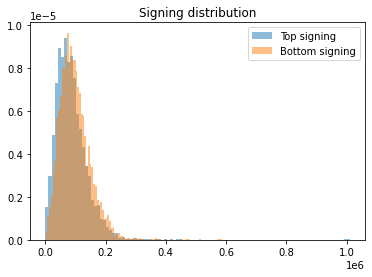

In [43]:
fig, ax = plt.subplots(1,1)
ax.hist(sign_top['update_average'], bins = 100, alpha =0.5, label = 'Top signing',density=True)
ax.set_title('Signing distribution')
ax.hist(sign_bottom['update_average'], bins = 100, alpha=0.5, label = "Bottom signing", density=True)
plt.legend()

4.2


In [44]:
from scipy.stats import ttest_ind
ttest_ind(sign_top['update_average'], sign_bottom['update_average'])

Ttest_indResult(statistic=-14.452368101354606, pvalue=5.435352130291242e-47)

4.3

4.4: We would expect no difference since this value propogates from before.

In [48]:
baseline_grouped = df.groupby("condition")['baseline_average'].agg(['mean','std'])

In [49]:
baseline_grouped

,mean,std
condition,,
Sign Bottom,75020.747098,50256.586376
Sign Top,59696.234696,49956.317151


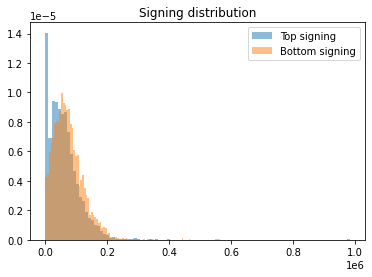

In [51]:
fig, ax = plt.subplots(1,1)
ax.hist(sign_top['baseline_average'], bins = 100, alpha =0.5, label = 'Top signing',density=True)
ax.set_title('Signing distribution')
ax.hist(sign_bottom['baseline_average'], bins = 100, alpha=0.5, label = "Bottom signing", density=True)
plt.legend()

In [52]:
from scipy.stats import ttest_ind
ttest_ind(sign_top['baseline_average'], sign_bottom['baseline_average'])

Ttest_indResult(statistic=-17.75773299430071, pvalue=9.333114026345824e-70)

## Interlude: Something is dodgy about this data...

---

Noticing the oddities in the data, you send an email to your contact at the insurance company asking about the integrity
 of the data. Their reply seems like something out of a detective movie:

> Dear researcher, I believe that this data is not to be trusted. I can't talk right now but will send further hints 
>throughout the week.

As a researcher, you know that [data integrity](https://en.wikipedia.org/wiki/Data_integrity) is a big deal, and decide
 to investigate.

### Task 5 — 9pts

The first hint you receive is: *there is something off about the kilometrage values in the data.*

1. For the baseline contract and for the updated contract, plot the distribution of odometer kilometrage reported for 
the first motorcycle insured in each policy. 
2. For the first motorcycle insured by the company in each policy, plot the difference between the number of kilometers
 reported in the baseline and in the updated contract.
3. **Discuss:** why is this data unlikely to have originated from real odometer readings?

---

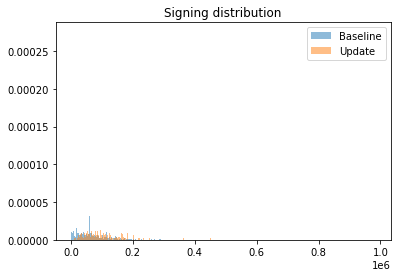

In [57]:
test = df.groupby('baseline_motorcycle1')
fig, ax = plt.subplots(1,1)
ax.hist(df['baseline_motorcycle1'], bins = 10000, alpha =0.5, label = 'Baseline',density=True)
ax.set_title('Signing distribution')
ax.hist(sign_bottom['update_motorcycle1'], bins = 10000, alpha=0.5, label = "Update", density=True)
plt.legend()

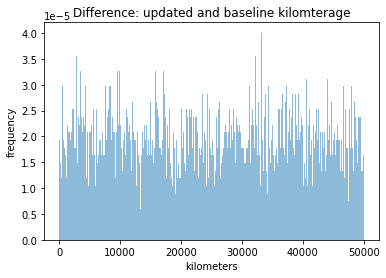

In [63]:
df['diff_motorcycle1'] = df['update_motorcycle1'] - df['baseline_motorcycle1']
fig, ax = plt.subplots(1,1)
ax.hist(df['diff_motorcycle1'], bins = 1000, alpha =0.5, label = 'Baseline',density=True)
ax.set_title("Difference: updated and baseline kilomterage")
ax.set_xlabel("kilometers")
ax.set_ylabel("frequency")
plt.show()

The data *definitely* looks fake. First of all, since we're studying humans we would expect a normal distribution in how many more kilometers someone drives between baseline and updated. Whereas here it looks almost uniformly sampled. Moreover, no one person drove more than 50,000 kilometers. Given the distribution this seems *very* unlikely. 

### Task 6 — 15pts

The second hint you receive is: *there is something off with the last digits of the reported kilometrages.*

1. Considering the baseline kilometrage of the first motorcycle in each contract (`baseline_motorcycle1`), plot the 
distribution of occurrences of the last three digits. Repeat the same for the updated kilometrage of the first 
motorcycle in each contract (`update_motorcycle1`).

3. **Discuss:** What are the differences between the two distributions?

4. **Discuss:** Hypothesize a **plausible** cause for the patterns observed in the digit distribution of the baseline
 kilometrage of the first motorcycle.
    
---

**Hint:** The last two digits of the number 12314 are 314. Note that you should consider the three last digits together,
 not separately!

In [99]:
# 6.1
df['last3digs_baseline'] = df['baseline_motorcycle1'].apply(lambda x: x % 1000)
df['last3digs_update'] = df['update_motorcycle1'].apply(lambda x: x % 1000)

Text(0, 0.5, 'Count')

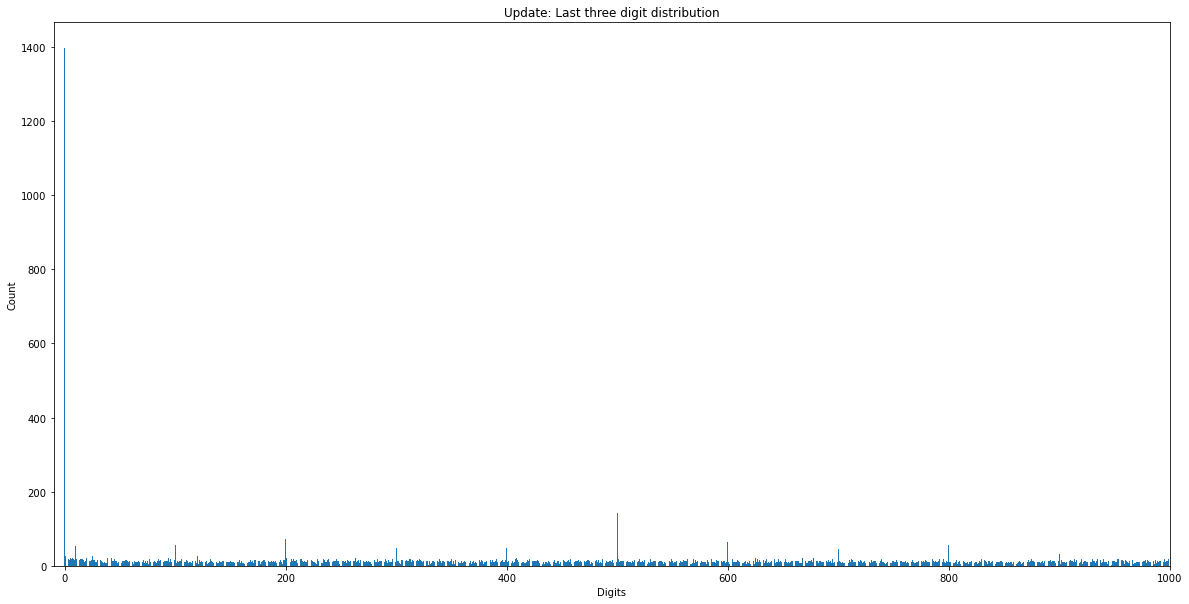

In [137]:
grouped50_baseline = df.groupby('last3digs_baseline')['id'].count().sort_values(ascending=False)
fig, ax = plt.subplots(1,1, figsize = (20,10))
ax.bar(x=grouped50_baseline.index,height= grouped50_baseline.values, width = 0.8)
ax.set_xlim(-10,1000)
ax.set_title("Update: Last three digit distribution")
ax.set_xlabel("Digits")
ax.set_ylabel("Count")

Text(0, 0.5, 'Count')

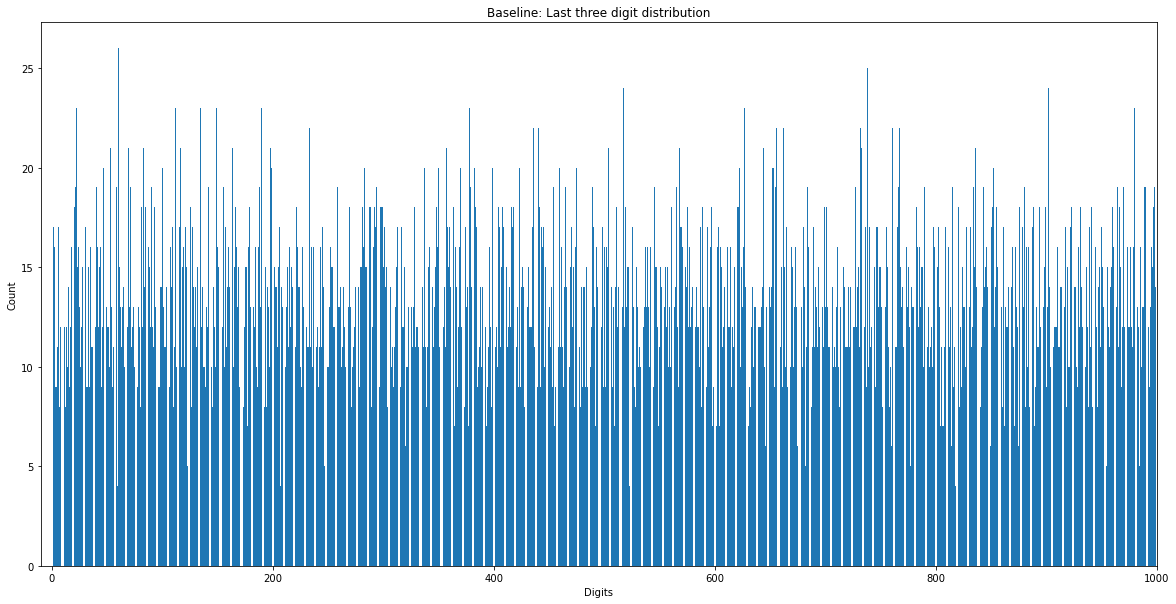

In [107]:
grouped50_update = df.groupby('last3digs_update')['id'].count().sort_values(ascending=False)
fig, ax = plt.subplots(1,1, figsize = (20,10))
ax.bar(x=grouped50_update.index,height= grouped50_update.values, width = 0.8)
ax.set_xlim(-10,1000)
ax.set_title("Baseline: Last three digit distribution")
ax.set_xlabel("Digits")
ax.set_ylabel("Count")

6.2
Well... It's clear something strange is going on. We would expect the distribution of the last three digits to be random. In the update dataset we do see this phenomena hold. All the top 50 digits have just under 20 instances on average. Which aligns with the assumption that the distribution is uniform since we would expect 13486/1000 mentions of each last number. However, for the baseline we clearly notice that the number 0 occurs almost 1,400 (**provide a statistical score (z-score**). 

6.3 
Maybe they asked the user to write their baseline score. Since our memory isn't great, we are likely to use values that are easy like ones that end with 0, 00, or 000. 

### Task 7 — 15pts

The third (and last) hint you receive is: *there is something wrong with the fonts.*

Your anonymous source explains that the `.tsv` file sent to you was derived from an Excel sheet. There, some of the rows
 were written in the font *Helvetica* while others were written in the font *Arial*. Your anonymous source sends you a 
 file with the relation between policy id and the font used in the respective row (`fonts.csv`), and tells you that the
  rows with *Helvetica* font were fabricated.

1. Load `fonts.csv` and merge the `font` column into your pandas dataframe.
2. Considering only the kilometrage of the first motorcycle in each policy, calculate the number of rows with the Arial 
and the Helvetica font, respectively. Also, plot the distribution of baseline kilometers for rows with the Arial font 
and for rows with the Helvetica font.
3. Similar to what was done in task 6. Plot the distribution of the last three digits for 1) the first motorcycle in 
each baseline contract (`baseline_motorcycle1`); and 2) the first motorcycle in each updated contract
 (`update_motorcycle1`).
4. **Discuss:** Why do these analyses provide evidence that the rows with Helvetica font were fabricated?

---

In [108]:
fonts = pd.read_csv("data/fonts.csv")

In [132]:
df_with_fonts = df.merge(fonts, on ='id')

In [133]:
df_with_fonts.groupby("font")['baseline_motorcycle1'].agg(['count','sum'])

,count,sum
font,,
Arial,6744,452561947
Helvetica,6742,455654334


In [134]:
arial = df_with_fonts[df_with_fonts['font'] == 'Arial']
helv = df_with_fonts[df_with_fonts['font'] == 'Helvetica']

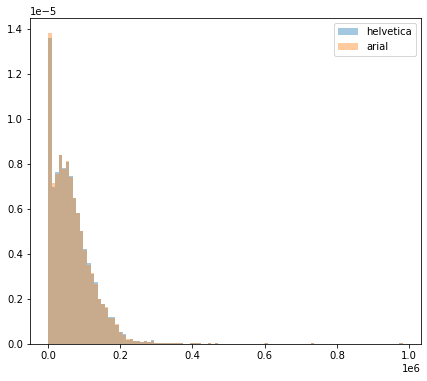

In [136]:
fig, ax = plt.subplots(figsize=(7,6))
ax.hist(helv['baseline_motorcycle1'], alpha = 0.4, label='helvetica', density=True, bins=100)
ax.hist(arial['baseline_motorcycle1'], alpha = 0.4, label='arial',density=True, bins = 100)
plt.legend()

In [138]:
# 6.1
helv['last3digs_baseline'] = helv['baseline_motorcycle1'].apply(lambda x: x % 1000)
arial['last3digs_baseline'] = arial['baseline_motorcycle1'].apply(lambda x: x % 1000)
helv['last3digs_update'] = helv['update_motorcycle1'].apply(lambda x: x % 1000)
arial['last3digs_update'] = arial['update_motorcycle1'].apply(lambda x: x % 1000)

<ipython-input-138-19d5e8dd9765>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  helv['last3digs_baseline'] = helv['baseline_motorcycle1'].apply(lambda x: x % 1000)
<ipython-input-138-19d5e8dd9765>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arial['last3digs_baseline'] = arial['baseline_motorcycle1'].apply(lambda x: x % 1000)
<ipython-input-138-19d5e8dd9765>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

Text(0, 0.5, 'Count')

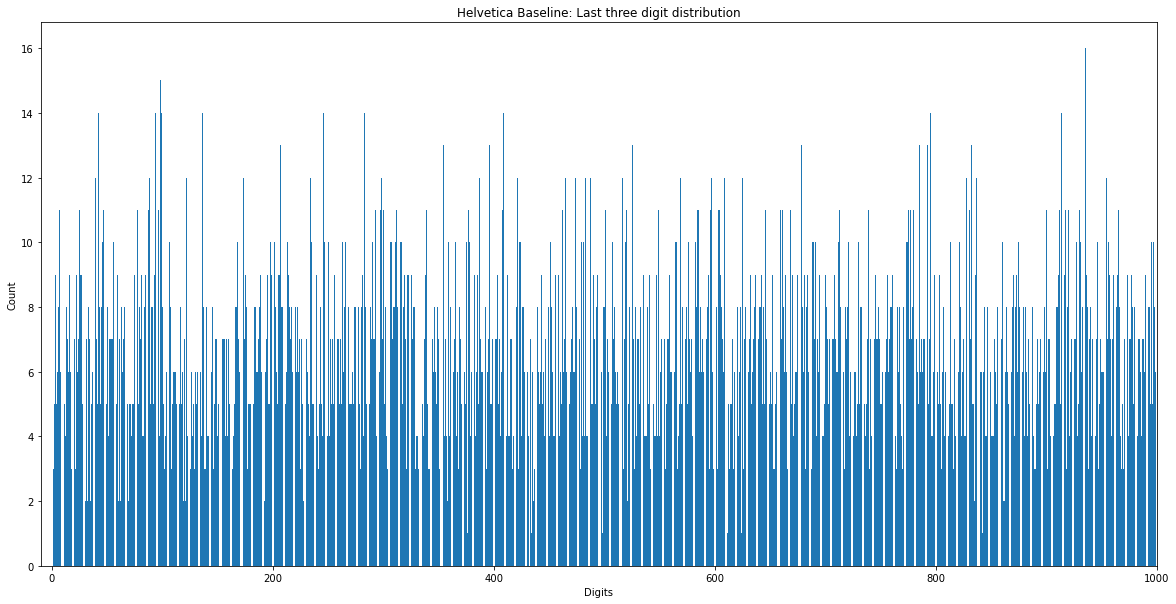

In [140]:
helv_baseline = helv.groupby('last3digs_baseline')['id'].count().sort_values(ascending=False)
fig, ax = plt.subplots(1,1, figsize = (20,10))
ax.bar(x=helv_baseline.index,height= helv_baseline.values, width = 0.8)
ax.set_xlim(-10,1000)
ax.set_title("Helvetica Baseline: Last three digit distribution")
ax.set_xlabel("Digits")
ax.set_ylabel("Count")

Text(0, 0.5, 'Count')

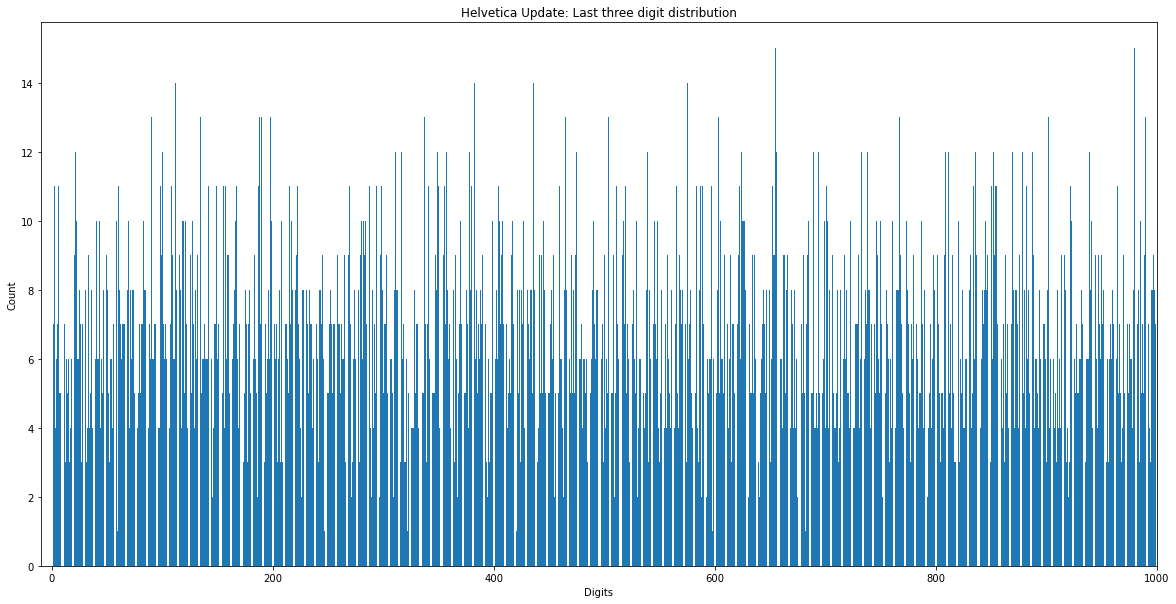

In [143]:
helv_update = helv.groupby('last3digs_update')['id'].count().sort_values(ascending=False)
fig, ax = plt.subplots(1,1, figsize = (20,10))
ax.bar(x=helv_update.index,height= helv_update.values, width = 0.8)
ax.set_xlim(-10,1000)
ax.set_title("Helvetica Update: Last three digit distribution")
ax.set_xlabel("Digits")
ax.set_ylabel("Count")

Text(0, 0.5, 'Count')

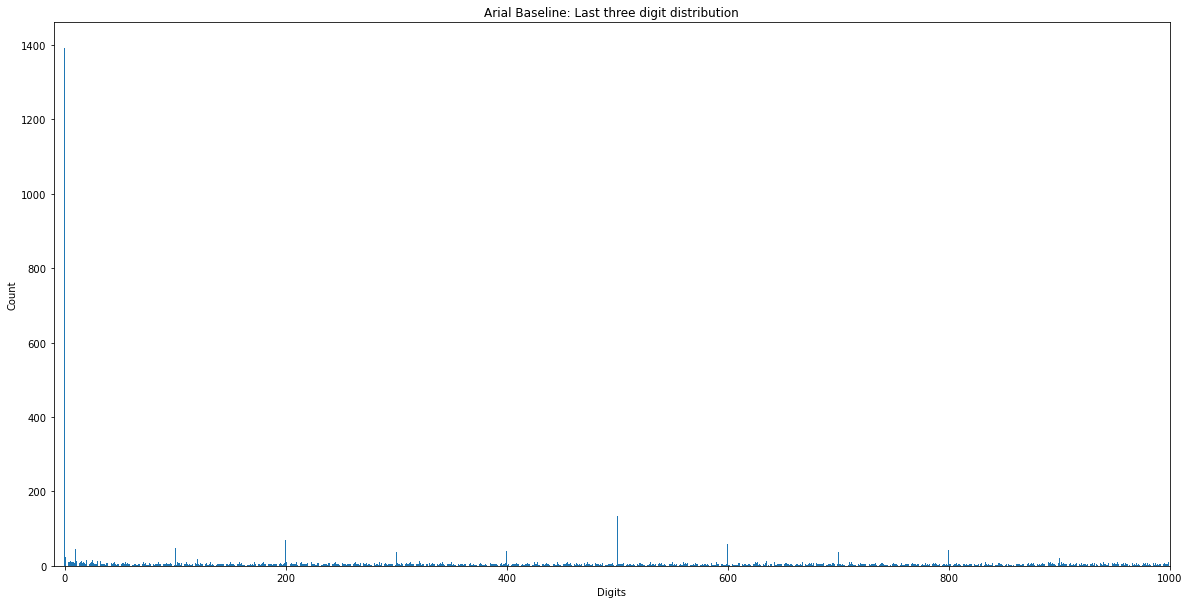

In [145]:
arial_baseline = arial.groupby('last3digs_baseline')['id'].count().sort_values(ascending=False)
fig, ax = plt.subplots(1,1, figsize = (20,10))
ax.bar(x=arial_baseline.index,height= arial_baseline.values, width = 0.8)
ax.set_xlim(-10,1000)
ax.set_title("Arial Baseline: Last three digit distribution")
ax.set_xlabel("Digits")
ax.set_ylabel("Count")

Text(0, 0.5, 'Count')

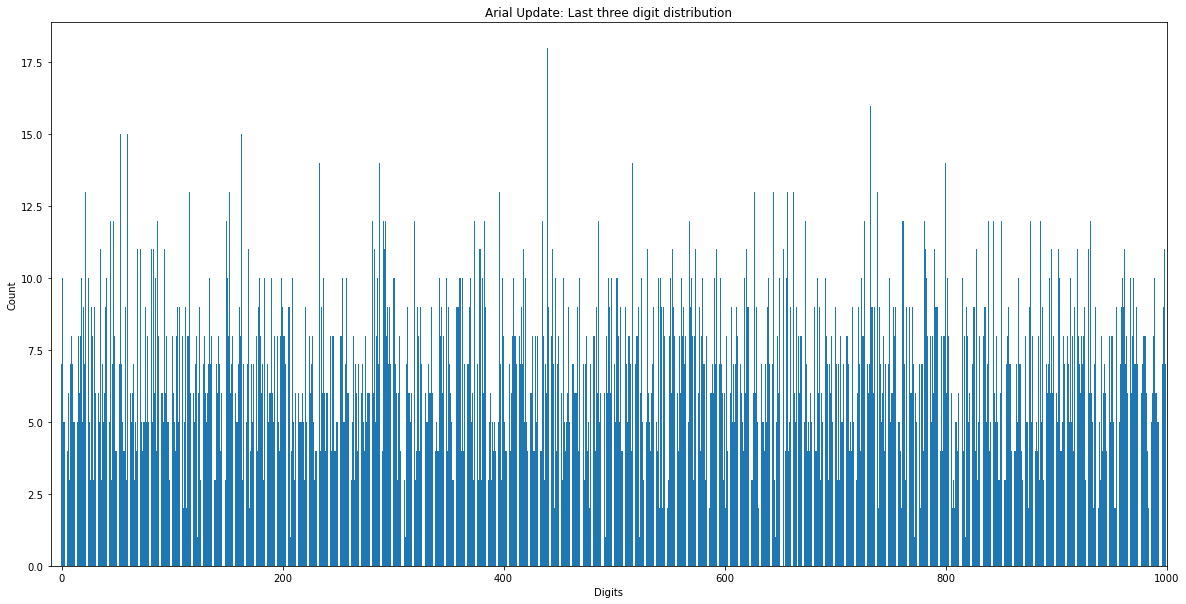

In [144]:
arial_update = arial.groupby('last3digs_update')['id'].count().sort_values(ascending=False)
fig, ax = plt.subplots(1,1, figsize = (20,10))
ax.bar(x=arial_update.index,height= arial_update.values, width = 0.8)
ax.set_xlim(-10,1000)
ax.set_title("Arial Update: Last three digit distribution")
ax.set_xlabel("Digits")
ax.set_ylabel("Count")

# Discussion:
Is the question wrong? Shouldn't ariel be fabricated? 

### Task 8 — 15pts

You've had enough! You decide to write an email to your PI (principal investigator, also known as "your boss") reporting
 the oddities you have observed in the data. Write a (brief) text (in markdown) of up to 300 words. Your text should:

- Use the analyses you did to make a convincing case that the data has been tampered with. 
- Grounded in your analyses, provide a plausible hypothesis about how the data has been tampered with.
- Discuss whether the data leads to the conclusion that signing at the top decreases dishonesty.

Structure your text into three bullets, analogous to the ones above.

You can reference images present in the notebook by indicating a task (e.g., image plotted in Task 3.3) or a cell 
number.

Note that you do not need to conduct any additional analysis to write this text. If you do, the code should be at the 
end of this notebook, i.e., after your answer.

---

**Hint:** The data has been tampered with in more than one way.